In [1]:
# Different methods of preprocessing training data.

%matplotlib inline
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the data

datasetPath = Path("../datasets/gtsrb/GTSRB/Final_Training/Images/")
labelsPathList = sorted([labelPath for labelPath in datasetPath.iterdir() if labelPath.is_dir()])
trainingImagesPathList = [ sorted([dataPath for dataPath in labelPath.iterdir() if dataPath.suffix == ".ppm"]) for labelPath in labelsPathList]

trainingImages = []
trainingImagesLabels = []

for trainingLabelsPath in trainingImagesPathList:
    for trainingImagePath in trainingLabelsPath:
        img = cv2.imread(str(trainingImagePath), cv2.IMREAD_UNCHANGED)
        trainingImages.append(img)
        trainingImagesLabels.append(int(trainingImagePath.parts[-2]))
        

In [ ]:
X_train = np.array(trainingImages)
y_train = np.array(trainingImagesLabels)

In [ ]:
# Each directory of labels contains a GT.csv file, which has information about the bounding box of each traffic sign.
# There will be 2 datasets:
#    - Not cropped
#    - Cropped by the values in GT.txt


# We'll start with the not cropped dataset.

# But before, all images need to have the same resolution.

scaledImages50by50 = []

for image in X_train:
    scaledImages50by50.append(cv2.resize(image, (50, 50), interpolation = cv2.INTER_AREA))

In [ ]:
scaledImages64by64 = []

for image in X_train:
    scaledImages64by64.append(cv2.resize(image, (64, 64), interpolation = cv2.INTER_AREA))

In [ ]:
def writeDataset(X_train, y_train, label, pathToWrite = Path("preprocessingNotebookTest/"), fileExtension = ".ppm"):
            
    pathToWrite = pathToWrite / label
    if not pathToWrite.exists() and not pathToWrite.is_dir():
        pathToWrite.mkdir()
    
    for i, image in enumerate(X_train):
        
        fullPath = pathToWrite / (str(i) + "_" + str(y_train[i]) + fileExtension)
        # EX: {pathToDirectory}/100_0.ppm
        
        cv2.imwrite(str(fullPath), image)

In [ ]:
writeDataset(scaledImages64by64, y_train, "64by64")

In [20]:
def readDataset(pathToRead):
    
    X_train = []
    y_train = []
    
    for imagePath in pathToRead.iterdir():
        
        X_train.append(cv2.imread(str(imagePath), cv2.IMREAD_UNCHANGED))
        
        label = (imagePath.name).split("_")[1].split(".")[0]
        y_train.append(int(label))
        
    return X_train, y_train

In [21]:
X_train, y_train = readDataset(Path("./preprocessingNotebookTest/50by50/"))
labels = []

with open("../datasets/gtsrb/labels.txt", "r") as fp:
    lines = fp.readlines()
    for label in lines:
        labels.append(label.strip())

Passing_right


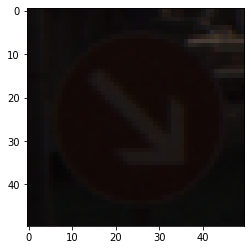

In [29]:
randomnum = np.random.randint(len(X_train))
plt.imshow(X_train[randomnum])
print(labels[y_train[randomnum]])

In [ ]:
# After resizing the images, let's enhance them!

